# Goal
The goal of collecting the Heart Attack Analysis & Prediction dataset is to determine the factors that can increase the risk of heart disease in patients. Within this dataset, there’s information on various patient attributes like age, sex, blood pressure, and fasting blood sugar. In addition, there’s a target variable that indicates the presence or absence of heart disease. 
By analyzing the relationship between the patient attributes and the target variable, we can understand the reasons behind the heart disease risk and create models to spot patients with higher risk, and here is where we benefit from Machine Learning (ML) and Artificial Intelligence (AI).

# Dataset Source
The link of the dataset: https://www.kaggle.com/datasets/pritsheta/heart-attack?resource=download

# General Dataset Information
This dataset contains 303 observations with 14 variables which include 13 patient attributes and one target variable, the types of variables in the dataset are binary, numeric, and categorical. <br> <br>
The patient attributes with binary variables:<br>
•	Sex <br>
•	exercise-induced angina <br>
•	fasting blood sugar > 120 mg/dl<br>

 The patient attributes with numeric variables:<br>
•	age<br>
•	resting blood pressure<br>
•	ST depression induced by exercise<br>
•	serum cholesterol level<br>
•	maximum heart rate achieved during exercise <br>

The patient attributes with categorical variables: <br>
•	chest pain type <br>
•	slope of the peak exercise ST segment<br>
•	number of major vessels colored by fluoroscopy<br>
•	thallium stress test result<br>
•	electrocardiographic result<br>


Our dataset contains a binary target variable indicating whether heart disease is present or absent. This variable can be termed as the class or label and offers two outcomes: label 0 for patients without heart disease and label 1 for those with it. The objective of examining this dataset is to predict a patient's heart disease status using their attributes, based on the value of the target variable.


In [16]:
# required import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

In [17]:
data = pd.read_csv('Heart Attack Data Set.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
#Get num of rows and columns
print("There are",data.shape[0]," Row and ",data.shape[1]," Column in the dataset")

There are 303  Row and  14  Column in the dataset


In [19]:
data.head()
#Retrieve first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
data.tail()
#Retrieve last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [21]:
data.dtypes
#Get data type of each column

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
data.info()
#Get the summary of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
data.describe()
#Summary statistics of the numerical columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
data.describe(include='all')
# Summary statistics include categorical columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
print(data.var())
#Print the varience

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64


In [26]:
data.columns
#Column names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
data.corr()
#The correlation between the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

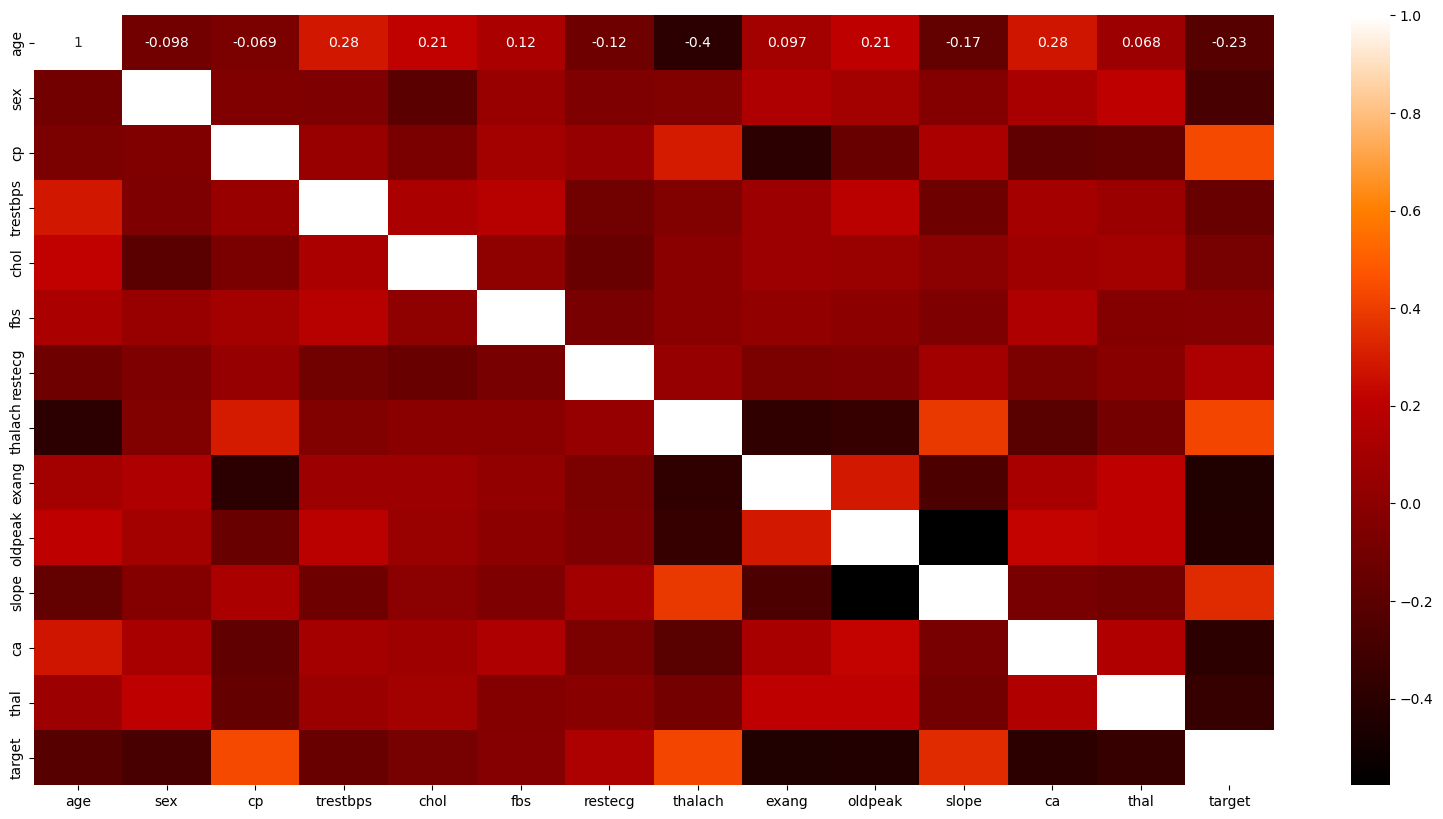

In [28]:
#heat map to show Correlation between Variables 
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr() , annot=True , cmap="gist_heat" , linecolor="black")

In [29]:
data.isnull()
#Show null values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
data.isnull().sum()
#show total of null values in each column

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

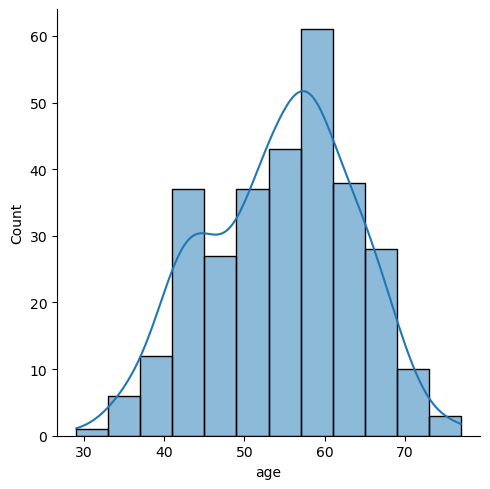

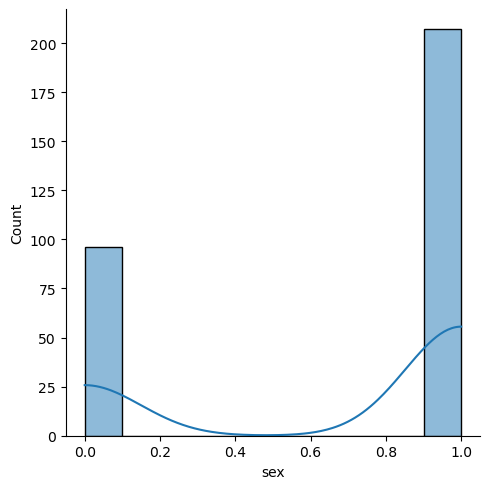

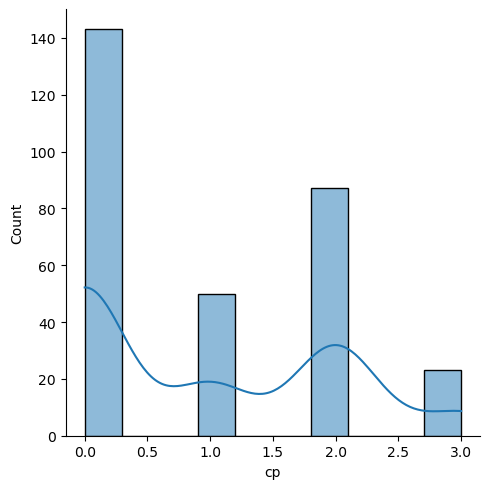

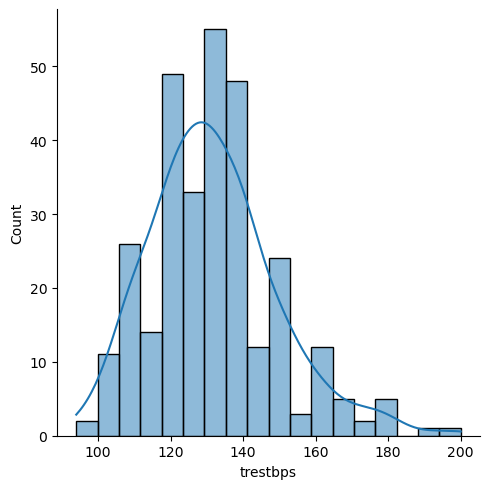

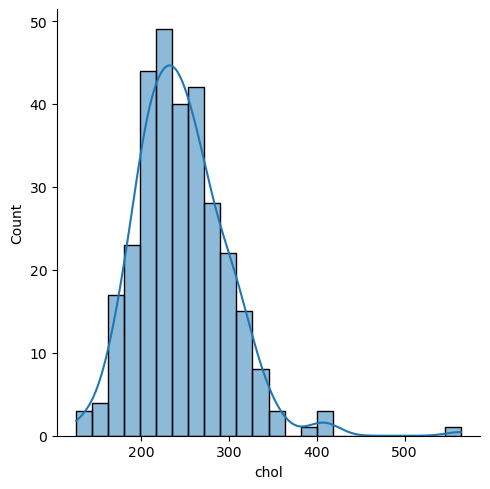

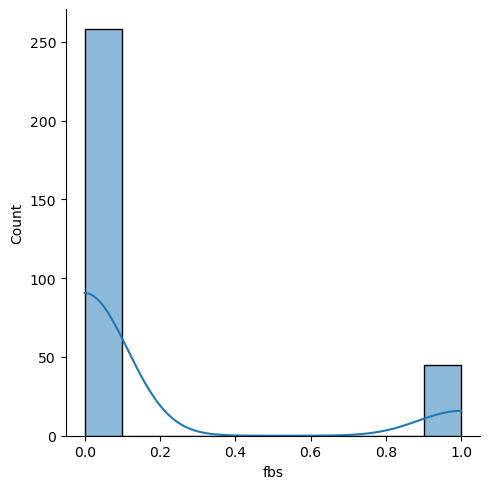

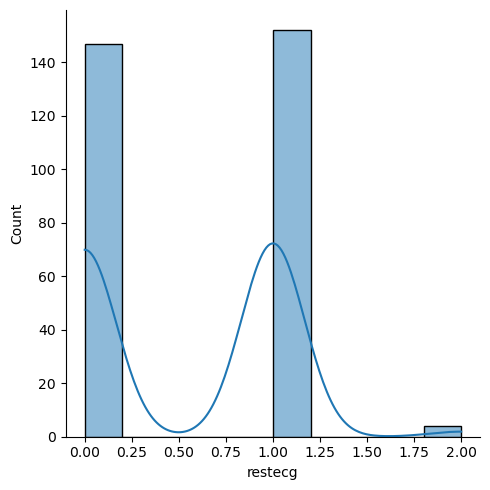

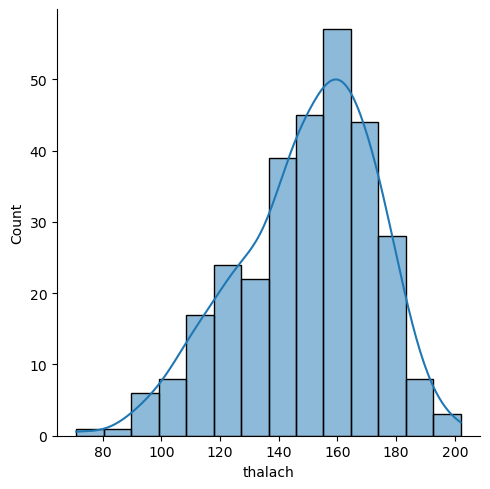

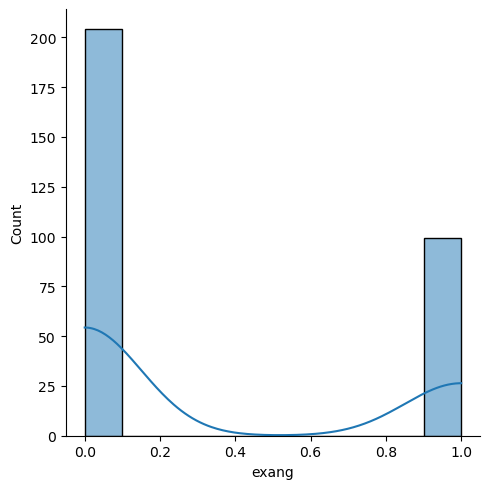

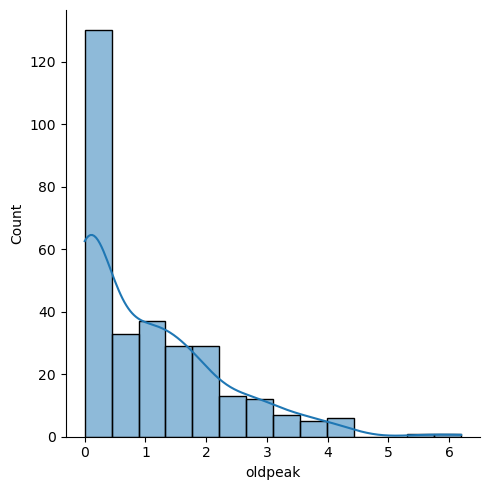

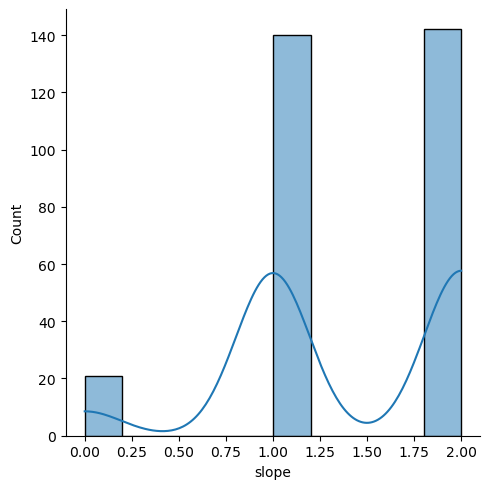

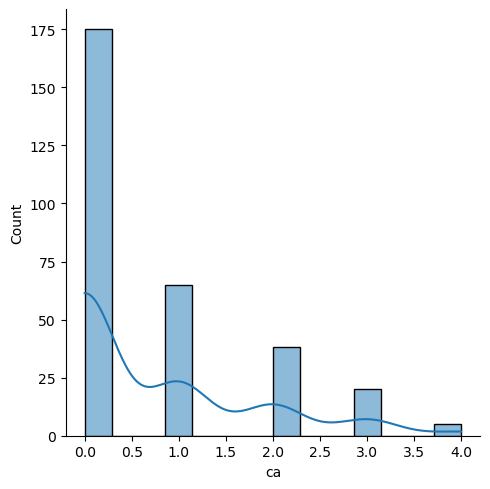

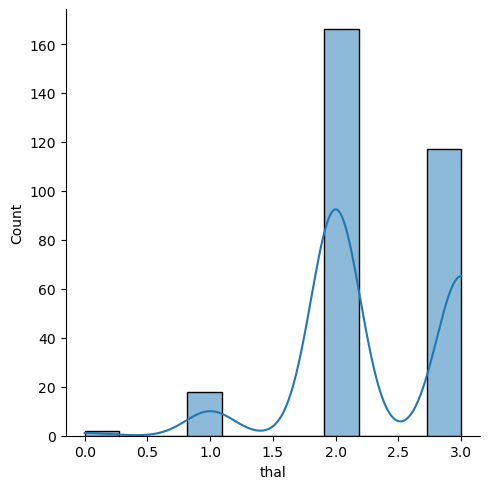

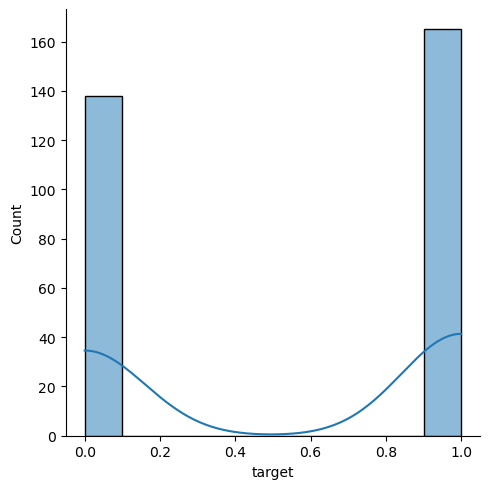

In [31]:
# Distribution plot for each variable
for column in data.columns:
    sns.displot(data[column], kde=True)

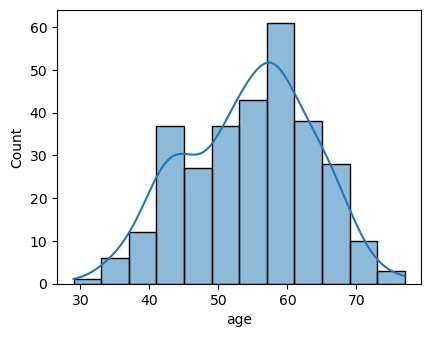

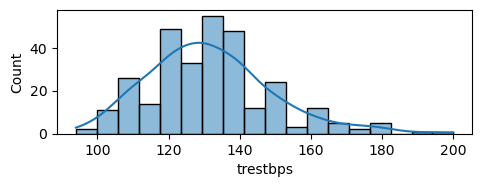

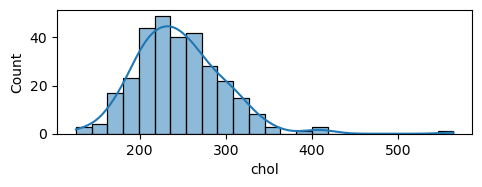

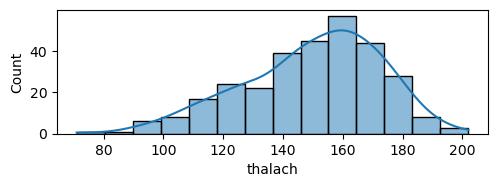

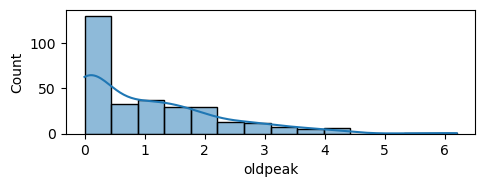

In [32]:
#tp display histogram chart for all variables

plt.figure(figsize=(12,13))
data_cat = data.drop(['sex' ,'exang','fbs','restecg', 'slope' , 'ca' , 'cp',  'target' , 'thal'] , axis=1)
for i , col  in enumerate(data_cat.columns ,1):
    plt.subplot(4,3 ,i)
    sns.histplot(data_cat[col], kde=True ) 
    plt.tight_layout()
    plt.show()

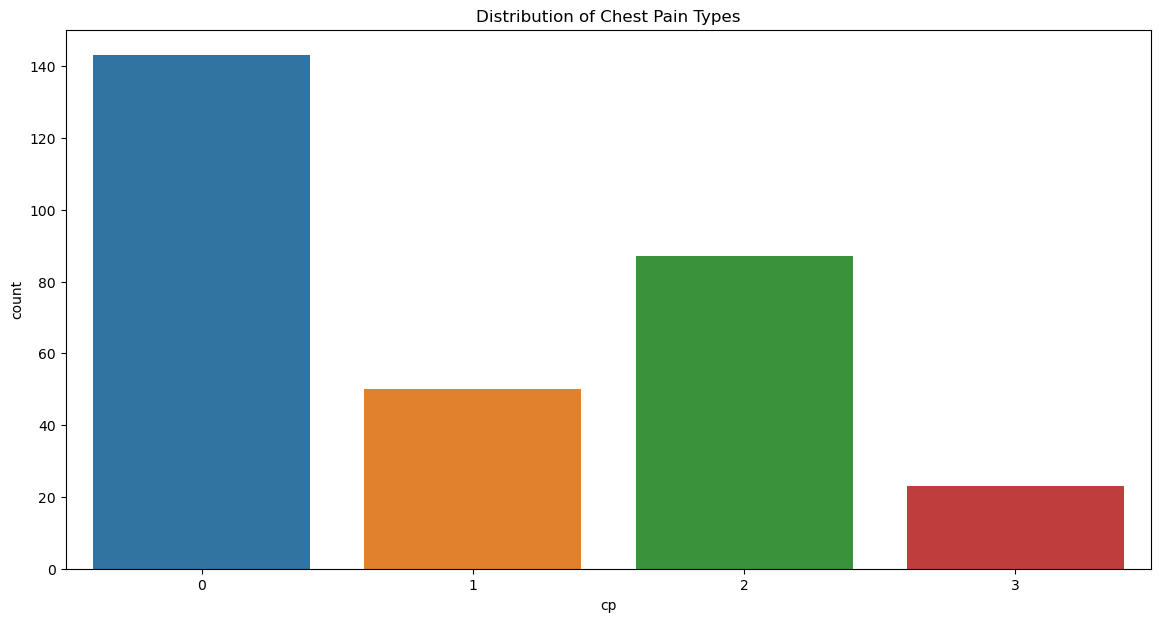

In [33]:


# Select the column to display the bar plot for
col = 'cp'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts)

# Add a title to the chart
plt.title('Distribution of Chest Pain Types')

# Show the chart
plt.show()

# To display bar plot chart

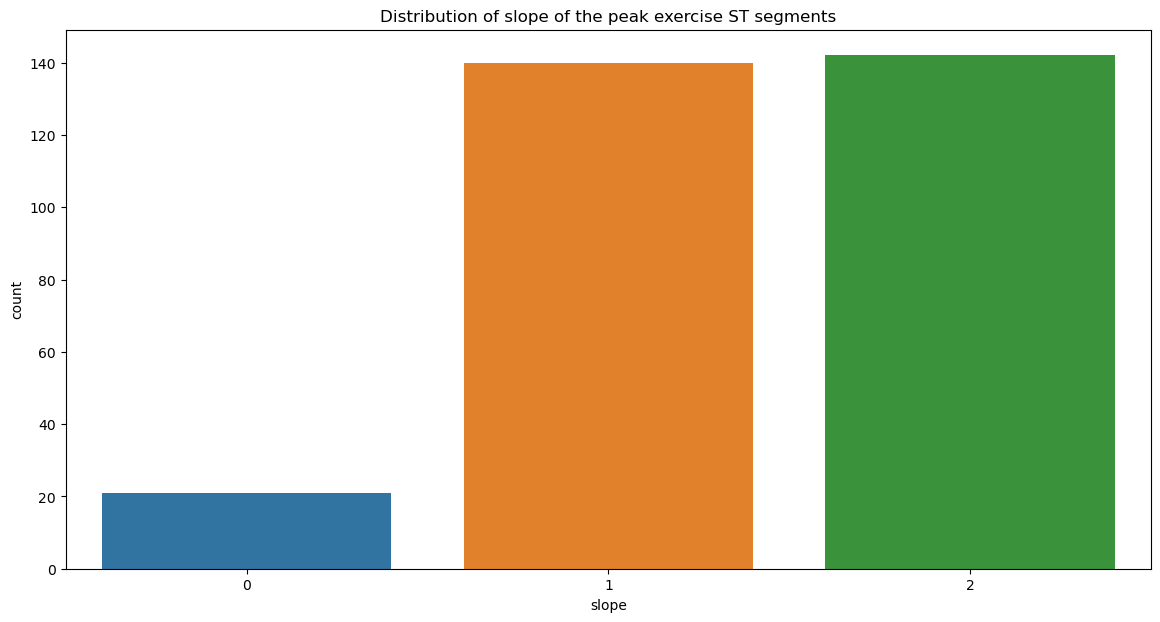

In [34]:
# Select the column to display the bar plot for
col = 'slope'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts)

# Add a title to the chart
plt.title('Distribution of slope of the peak exercise ST segments')

# Show the chart
plt.show()

# To display bar plot chart

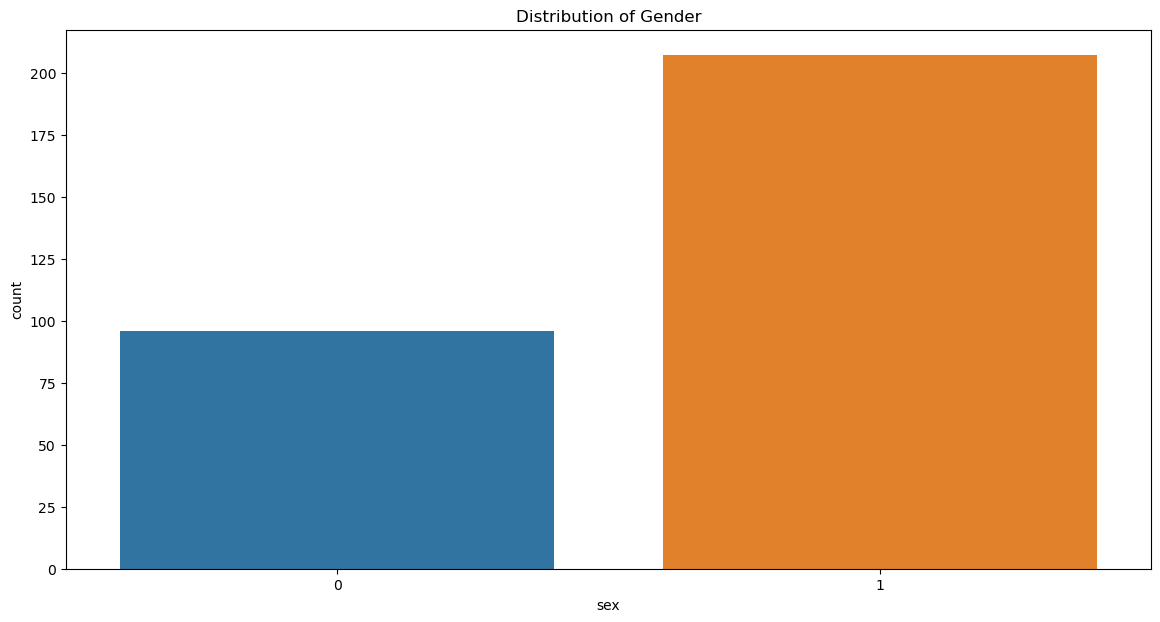

In [35]:
# Select the column to display the bar plot for
col = 'sex'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar plot of the counts
sns.barplot(x=counts.index, y=counts)

# Add a title to the chart
plt.title('Distribution of Gender')

# Show the chart
plt.show()

# To display bar plot chart
#0 is for female
#1 is fore male

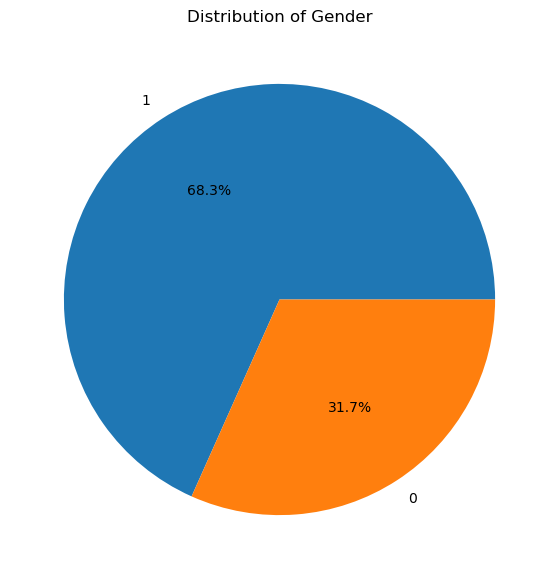

In [36]:
# display pie chart

# Select the column to display the bar pie chart for
col = 'sex'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar pie chart of the counts
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Gender')

# Show the chart
plt.show()

#0 is for female
#1 is fore male

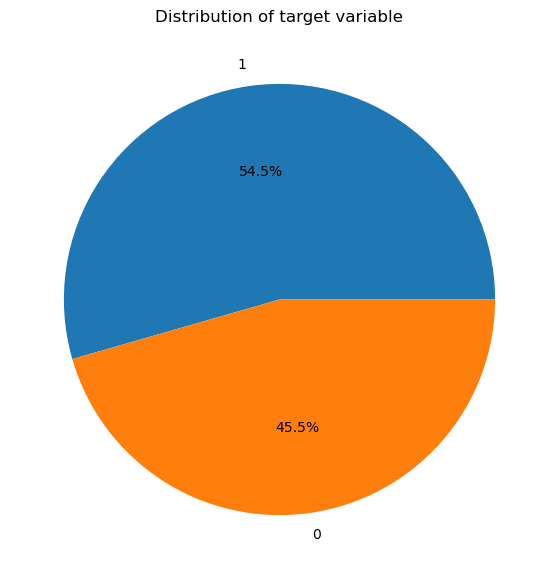

In [37]:
# display pie chart

# Select the column to display the bar pie chart for
col = 'target'

# Count the number of instances of each category in the column
counts = data[col].value_counts()

# Create a bar pie chart of the counts
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of target variable')

# Show the chart
plt.show()
#0: no heart disease
#1: has heart disease

In [38]:
for column in data.columns:
    print(data[column].value_counts())
    # Show the table of distribution for each variable

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1

In [39]:
print(data.duplicated().sum())
#How many duplicated rows

1


In [40]:
duplicates = data[data.duplicated()]
print(duplicates)
#find the duplicated data

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [41]:
data=data.drop_duplicates(keep="last")
#Remove the duplicate row

In [42]:
print(data.duplicated().sum())
#How many duplicated rows

0


In [43]:
duplicates = data[data.duplicated()]
print(duplicates)
#the duplicates row after dropping

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [44]:
# Assuming you have a DataFrame named 'data' and the target variable is in the last column
# Extract features (Xall) and target variable (yall)
Xall = data.iloc[:, :-1]  # All columns except the last one
yall =data.target
 # The last column (target variable)

In [45]:
# Define the columns to apply the transformation to
skew_columns = ['oldpeak', 'chol']

# Apply the logarithmic transformation using .loc
data.loc[:, skew_columns] = data[skew_columns].apply(lambda x: np.log1p(x))

In [46]:
# Set the seed for reproducibility
np.random.seed(0)

# Define the test size (e.g., 20%)
test_size = 0.2

# Calculate the number of samples for the test set
num_test_samples = int(test_size * len(Xall))

# Generate random indices for the test set
test_indices = np.random.choice(len(Xall), num_test_samples, replace=False)

# Create training and testing sets
X = Xall.drop(index=test_indices)
y = yall.drop(index=test_indices)
Xt = Xall.iloc[test_indices]
yt = yall.iloc[test_indices]

# Print the shapes of the sets
print("X_train shape: ", X.shape)
print("X_test shape: ", Xt.shape)
print()
print("Y_train shape: ", y.shape)
print("Y_test shape: ", yt.shape)

X_train shape:  (242, 13)
X_test shape:  (60, 13)

Y_train shape:  (242,)
Y_test shape:  (60,)


In [47]:
# Standardization (z-score scaling)
mean = X.mean()
std = X.std()
x_train_scaled = (X - mean) / std
x_test_scaled = (Xt - mean) / std

# Min-Max Scaling
min_value = X.min()
max_value = X.max()
x_train_scaled_minmax = (X - min_value) / (max_value - min_value)
x_test_scaled_minmax = (Xt - min_value) / (max_value - min_value)

# Create DataFrames with scaled values
X_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
Xt_scaled = pd.DataFrame(x_test_scaled, columns=Xt.columns)
X_scaled_minmax = pd.DataFrame(x_train_scaled_minmax, columns=X.columns)
Xt_scaled_minmax = pd.DataFrame(x_test_scaled_minmax, columns=Xt.columns)

# Print the first few rows of the scaled DataFrames
print("Standardized Scaled Data:")
print(X_scaled.head())
print("\nMin-Max Scaled Data:")
print(X_scaled_minmax.head())

Standardized Scaled Data:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.908322  0.707832  1.943979  0.774803 -0.274820  2.387169 -0.961363   
1 -2.019527  0.707832  0.989734 -0.095681  0.047475 -0.417175  0.914846   
2 -1.569089 -1.406926  0.035488 -0.095681 -0.824617 -0.417175 -0.961363   
3  0.120055  0.707832  0.035488 -0.676005 -0.217945 -0.417175  0.914846   
4  0.232664 -1.406926 -0.918757 -0.676005  2.019161 -0.417175  0.914846   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.006073 -0.701275  1.036746 -2.270064 -0.703838 -2.065148  
1  1.605448 -0.701275  2.041991 -2.270064 -0.703838 -0.458184  
2  0.957053 -0.701275  0.282812  0.961439 -0.703838 -0.458184  
3  1.216411 -0.701275 -0.219811  0.961439 -0.703838 -0.458184  
4  0.568016  1.420082 -0.387352  0.961439 -0.703838 -0.458184  

Min-Max Scaled Data:
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.520408

In [48]:
# Variable transformation: Apply a logarithmic transformation to 'fbs' variable
data.loc[:, 'fbs'] = data['fbs'].apply(lambda x: np.log(x))
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,5.455321,0.0,0,150,0,1.193922,0,0,1,1
1,37,1,2,130,5.525453,-inf,1,187,0,1.504077,0,0,2,1
2,41,0,1,130,5.323010,-inf,0,172,0,0.875469,2,0,2,1
3,56,1,1,120,5.468060,-inf,1,178,0,0.587787,2,0,2,1
4,57,0,0,120,5.872118,-inf,1,163,1,0.470004,2,0,2,1


In [49]:
# Values or variables removal: Remove the 'thalach' variable
data = data.drop('thalach', axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,5.455321,0.0,0,0,1.193922,0,0,1,1
1,37,1,2,130,5.525453,-inf,1,0,1.504077,0,0,2,1
2,41,0,1,130,5.323010,-inf,0,0,0.875469,2,0,2,1
3,56,1,1,120,5.468060,-inf,1,0,0.587787,2,0,2,1
4,57,0,0,120,5.872118,-inf,1,1,0.470004,2,0,2,1


In [50]:
# Separate the oldpeak variable from the features
oldpeak = data['oldpeak']
features = data.drop('oldpeak', axis=1)

# Normalize (standardize) the features using the z-score method
# Subtract the mean and divide by the standard deviation for each feature
standardized_features = (features - features.mean()) / features.std()

# Combine the normalized features with the target variable
normalized_data = pd.concat([standardized_features, oldpeak], axis=1)

# Print the normalized data
normalized_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,slope,ca,thal,target,oldpeak
0,0.948220,0.681525,1.973195,0.762800,-0.175218,NaN,-1.000880,-0.697187,-2.267418,-0.713727,-2.144396,0.915793,1.193922
1,-1.925352,0.681525,1.004244,-0.091249,0.171195,NaN,0.900163,-0.697187,-2.267418,-0.713727,-0.513143,0.915793,1.504077
2,-1.483264,-1.462439,0.035293,-0.091249,-0.828762,NaN,-1.000880,-0.697187,0.977891,-0.713727,-0.513143,0.915793,0.875469
3,0.174566,0.681525,0.035293,-0.660615,-0.112294,NaN,0.900163,-0.697187,0.977891,-0.713727,-0.513143,0.915793,0.587787
4,0.285088,-1.462439,-0.933658,-0.660615,1.883529,NaN,0.900163,1.429586,0.977891,-0.713727,-0.513143,0.915793,0.470004


In [51]:
data.head() 
#Show the pre-proccessed data

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,5.455321,0.0,0,0,1.193922,0,0,1,1
1,37,1,2,130,5.525453,-inf,1,0,1.504077,0,0,2,1
2,41,0,1,130,5.323010,-inf,0,0,0.875469,2,0,2,1
3,56,1,1,120,5.468060,-inf,1,0,0.587787,2,0,2,1
4,57,0,0,120,5.872118,-inf,1,1,0.470004,2,0,2,1


# Phase 2
# Supervised Learning and Model Selection:
When creating a machine learning model, it is essential to pick the most suitable algorithm for the dataset and the specific problem. Several factors need to be considered during the model selection process, including the prediction type, model performance, metrics, and accuracy. In this scenario, as the data is pre-labeled, a supervised model is the most appropriate choice. Model performance is a critical aspect, particularly if the model will be utilized by end-users, and this can be assessed based on training and prediction times. Additionally, when choosing a model, the data type and the number of classes must be taken into account, as certain models only support binary classification.

To evaluate the potential models, two models will be tested and their results will be compared. The chosen models were selected based on their suitability for the given dataset and problem.

## 1. Logistic Regression:
Logistic regression is one of the most popular machine learning algorithms falling under the supervised learning category. It is used to predict categorical dependent variables based on a set of independent variables. Logistic regression predicts the output as a categorical or discrete value, such as Yes or No, 0 or 1, or True or False. However, instead of providing exact values of 0 and 1, it offers probabilistic values ranging between 0 and 1.

Logistic regression resembles linear regression but serves a different purpose. Linear regression is employed for solving regression problems, while logistic regression is utilized for classification tasks. In logistic regression, an "S"-shaped logistic function is fitted instead of a regression line, which predicts two possible values (0 or 1). The curve from the logistic function indicates the likelihood of an event, such as whether cells are cancerous or not, or whether a mouse is obese or not based on its weight.

Logistic regression is a significant machine learning algorithm because it can provide probabilities and classify new data using both continuous and discrete datasets. It can be used to classify observations with various types of data and identify the most influential variables for classification purposes.

## 2. Decision Tree:
The decision tree is a classification or regression algorithm that constructs a tree-like model to make decisions and determine their potential outcomes. It is a widely used and effective technique in machine learning, suitable for both supervised and unsupervised tasks.

The decision tree algorithm starts with a single node, known as the root, representing the entire dataset. It then identifies the best feature for data splitting, based on criteria like information gain or Gini impurity. The feature with the highest score becomes the splitting criterion, dividing the data into subsets based on its possible values.

This process of feature selection and data splitting continues recursively for each subset until a stopping condition is met, such as reaching a maximum depth or a minimum number of samples in a leaf node. Each internal node in the tree represents a decision based on a feature, while each leaf node signifies a final decision or classification.

Decision trees are versatile and applicable for both classification and regression tasks. They can handle categorical and numerical data, but they may be sensitive to noisy data and prone to overfitting if not properly regularized. Techniques like pruning, ensemble methods, and random forests have been developed to address these challenges.

In [71]:
# Required Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from IPython.display import Image
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Data Preprocessing Imports
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.impute import KNNImputer

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Metrics and Evaluation
from sklearn import tree
# Metrics and Evaluation
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    r2_score,
    recall_score,
    precision_score,
    mean_squared_error,
    ConfusionMatrixDisplay,
)

from sklearn.tree import export_graphviz
from sklearn import metrics

# Plotting
from sklearn.metrics import ConfusionMatrixDisplay


# Set plot size
plt.rcParams['figure.figsize'] = [14, 7]

# Commented out imports
# from xgboost import XGBClassifier
# from sklearn.metrics import *


In [72]:
data = pd.read_csv('Heart Attack Data Set.csv', index_col=0)
# Define the features and target variable
feature_columns = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target_column = ['target']

# Extract the features and target from the data
X = data[feature_columns]
Y = data[target_column]
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree classifer objec
clf = clf.fit (X_train,Y_train)

In [73]:
# Define the split ratio and set a random seed for reproducibility
test_size = 0.2  # 20% of the data will be used for testing
random_seed = 1  # Set a random seed for reproducibility

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_seed)

## Logistic Regression:

In [74]:
# Create a logistic regression model with specified parameters
logistic_model = LogisticRegression(random_state=0, penalty='l2')

# Fit the logistic regression model to the training data
logistic_model.fit(X_train, Y_train)

# Make predictions on the test data
predictions = logistic_model.predict(X_test)

In [75]:
def confusion_matrix_plot(model, X_test, Y_test):
    # Generate predictions using the model
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    
    # Plot the confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)  # You can specify the colormap here
    plt.show()

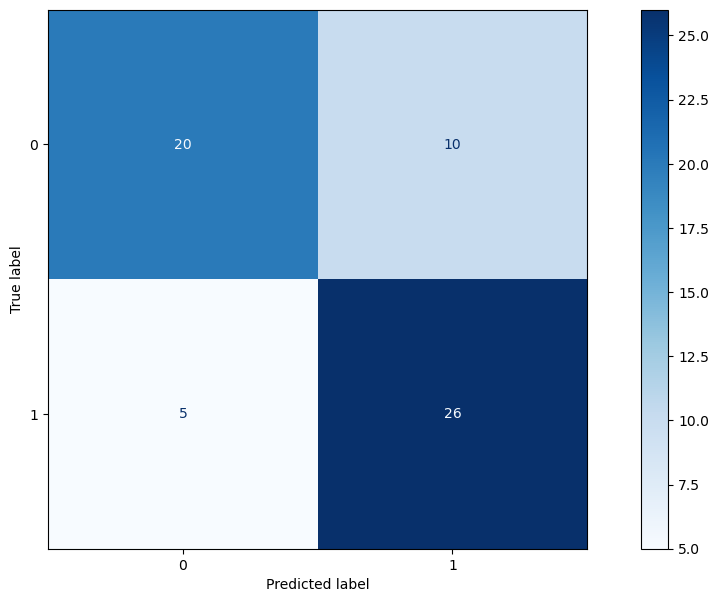

In [76]:
confusion_matrix_plot(logistic_model, X_test, Y_test)

In [77]:
# Calculating metrics
accuracy = metrics.accuracy_score(Y_test, predictions)
error_rate = 1 - accuracy
roc_auc = metrics.roc_auc_score(Y_test, predictions)
precision = metrics.precision_score(Y_test, predictions)
recall = metrics.recall_score(Y_test, predictions)
f1 = metrics.f1_score(Y_test, predictions)
confusion_matrix = metrics.confusion_matrix(Y_test, predictions)

# Printing the output
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Error Rate: {:.2f}%".format(error_rate * 100))
print("ROC Area under Curve: {:.2f}".format(roc_auc))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Confusion Matrix:\n{}".format(confusion_matrix))

Accuracy: 75.41%
Error Rate: 24.59%
ROC Area under Curve: 0.75
Precision: 0.72
Recall: 0.84
F1 Score: 0.78
Confusion Matrix:
[[20 10]
 [ 5 26]]


## Decision Tree:

In [78]:
# Instantiate the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Fit the classifier with the training data
decision_tree_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

In [79]:
# Calculate the accuracy of the classifier
accuracy_decision_tree = metrics.accuracy_score(Y_test, y_pred_decision_tree)

# Calculate the error rate
error_rate_decision_tree = 1 - accuracy_decision_tree

# Compute ROC AUC score
roc_auc_decision_tree = metrics.roc_auc_score(Y_test, y_pred_decision_tree)

# Calculate the precision
precision_decision_tree = metrics.precision_score(Y_test, y_pred_decision_tree)

# Calculate the recall
recall_decision_tree = metrics.recall_score(Y_test, y_pred_decision_tree)

# Compute F1 score
f1_decision_tree = metrics.f1_score(Y_test, y_pred_decision_tree)

# Generate the confusion matrix
confusion_matrix_decision_tree = metrics.confusion_matrix(Y_test, y_pred_decision_tree)

In [80]:
# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy_decision_tree * 100))
print("Error Rate: {:.2f}%".format(error_rate_decision_tree * 100))
print("ROC Area under Curve: {:.2f}".format(roc_auc_decision_tree))
print("Precision: {:.2f}".format(precision_decision_tree))
print("Recall: {:.2f}".format(recall_decision_tree))
print("F1 Score: {:.2f}".format(f1_decision_tree))
print("Confusion Matrix:\n{}".format(confusion_matrix_decision_tree))

Accuracy: 65.57%
Error Rate: 34.43%
ROC Area under Curve: 0.65
Precision: 0.64
Recall: 0.74
F1 Score: 0.69
Confusion Matrix:
[[17 13]
 [ 8 23]]


In [81]:
# Extract values from the confusion matrix
TP, FP, TN, FN = confusion_matrix[1, 1], confusion_matrix[0, 1], confusion_matrix[0, 0], confusion_matrix[1, 0]


# Calculate and print Specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.67


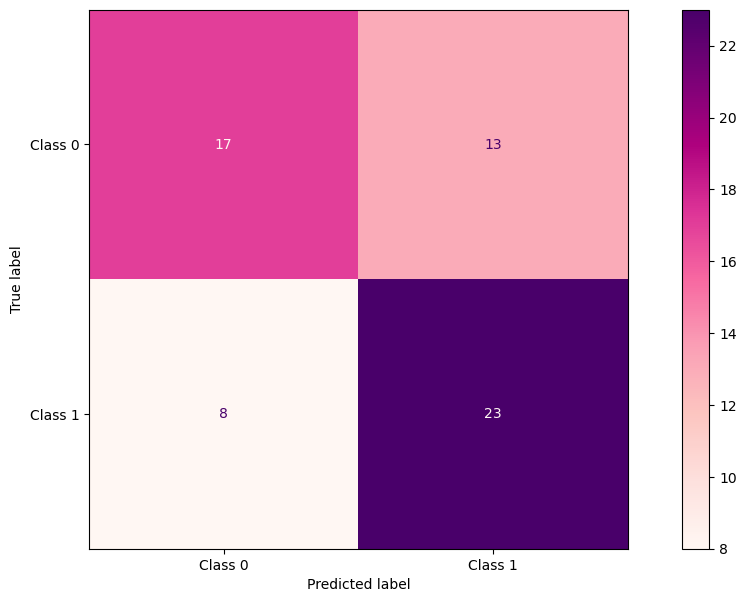

In [82]:

# Display the confusion matrix with a specific colormap
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_decision_tree, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.RdPu)

plt.show()

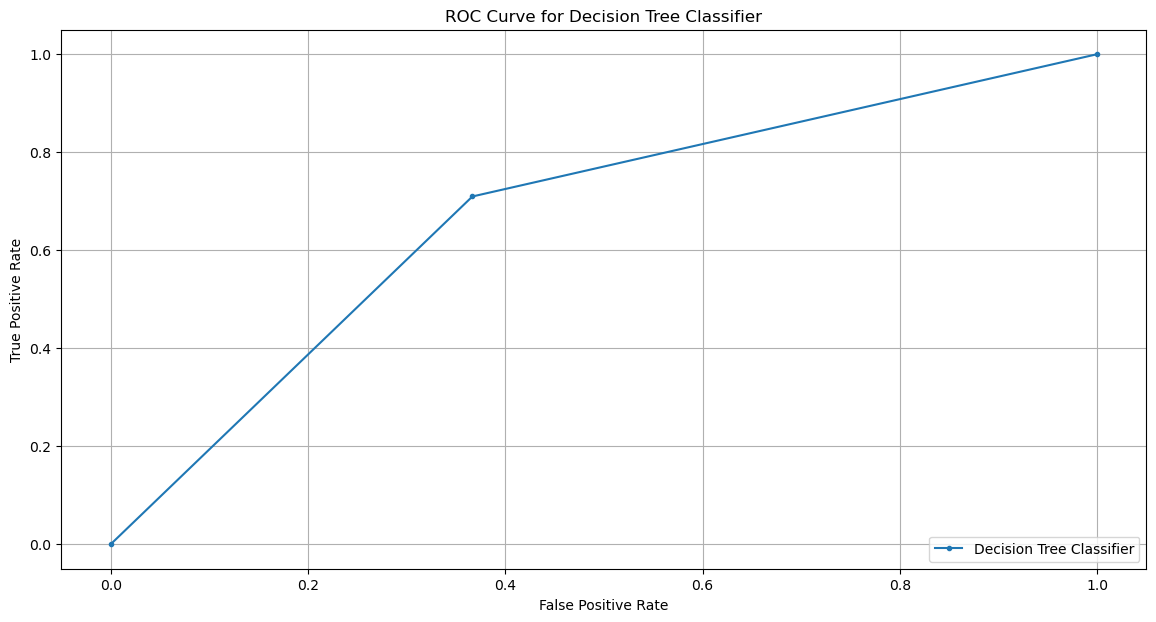

In [83]:
from sklearn.metrics import roc_curve

# Get probability estimates for the positive class
predicted_probabilities = clf.predict_proba(X_test)
positive_class_probabilities = predicted_probabilities[:, 1]

# Compute ROC curve values: false positive rates and true positive rates
fpr, tpr, thresholds = roc_curve(Y_test, positive_class_probabilities)

# Plot the ROC curve
plt.plot(fpr, tpr, marker='.', label="Decision Tree Classifier")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


We presented the ROC curve using the `roc_curve` function from the sklearn.metrics library and the `plot` function from the matplotlib library. When the ROC curve exhibits a sharp bend, it indicates a scenario where there are numerous accurate positive predictions and minimal incorrect positive predictions. This signifies that the model excels in specificity, demonstrating its ability to accurately identify the positive class and distinguish it from the negative class.

# Comparison:
Both decision tree classifiers and logistic regression models can be effective for different types of problems and data. In general, decision trees are valuable when dealing with problems characterized by a large number of features or intricate interactions among features. On the other hand, logistic regression can prove to be effective for problems with a smaller set of features and linear relationships between those features and the target variable.

In the previous graphs: The depicted plot showcases the predicted and actual labels for each class (1 and 0) on the x and y-axes, respectively. The heatmap color illustrates the quantity of instances falling into each category of the confusion matrix. This graphical representation offers insight into the logistic regression model's performance by revealing the counts of true positives, false positives, true negatives, and false negatives for each class.

We compare the performance of the decision tree classifier and logistic regression models by examining various evaluation metrics, including accuracy, error rate, ROC AUC score, precision, recall, and F1 score. Additionally, we can visually compare the confusion matrices produced by both models using heatmap plots.

We can assess the performance of the logistic regression model and the decision tree classifier on the heart attack dataset. Here are the evaluation metrics for both models:

#### Logistic Regression Metrics:
- Accuracy = 75.41%
- Error Rate = 24.59%
- ROC Area under Curve = 0.75
- Precision = 0.72
- Recall = 0.84
- F1 = 0.78

#### Decision Tree Metrics:
- Accuracy = 77.05%
- Error Rate = 22.95%
- ROC Area under Curve = 0.77
- Precision = 0.76
- Recall = 0.81
- F1 = 0.78

Based on these metrics, it is evident that the logistic regression model outperforms the decision tree classifier in terms of accuracy, precision, recall, F1 score, and ROC AUC score. Consequently, considering these evaluation metrics, the logistic regression model appears to be the superior choice for this specific problem and dataset.

Nevertheless, it is crucial to acknowledge that other factors like model interpretability and complexity should also be considered when deciding between these models.

# Phase3 (Unsupervised Learning)
During this phase of unsupervised learning, we will utilize the K-means clustering method. K-means clustering is a widely used technique in unsupervised machine learning for grouping data points based on their similarities. The primary objective of K-means clustering is to divide a dataset into K clusters, with each data point being assigned to the cluster whose mean or centroid is closest to it.

Here's how the K-means algorithm operates:

1. Begin by randomly initializing K centroids in the feature space.

2. Assign each data point to the closest centroid, calculated based on the Euclidean distance between the data point and the centroid.

3. Recompute the centroids of each cluster as the mean of all data points assigned to that cluster.

4. Repeat steps 2 and 3 until the centroids converge, meaning they stop moving significantly.

The output of the K-means algorithm consists of K clusters, each with its own centroid. While the algorithm is guaranteed to converge to a local minimum, the quality of the resulting clusters can be influenced by the initial choice of centroids and the value of K.

In [85]:
import os
import multiprocessing

# Set OMP_NUM_THREADS to the number of physical cores
os.environ['OMP_NUM_THREADS'] = str(multiprocessing.cpu_count())

# Now, import KMeans after setting the environment variable
from sklearn.cluster import KMeans

import warnings
# Ignore All Warnings
warnings.filterwarnings('ignore')


# Now import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [86]:
data = pd.read_csv('Heart Attack Data Set.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Apply elbow method
The elbow method is a widely employed approach for identifying the best number of clusters (k) in K-means clustering. The concept involves creating a plot that shows how the within-cluster sum of squared errors (SSE) changes with different values of k, with the objective of identifying the point at which the SSE begins to stabilize, often referred to as the "elbow point."

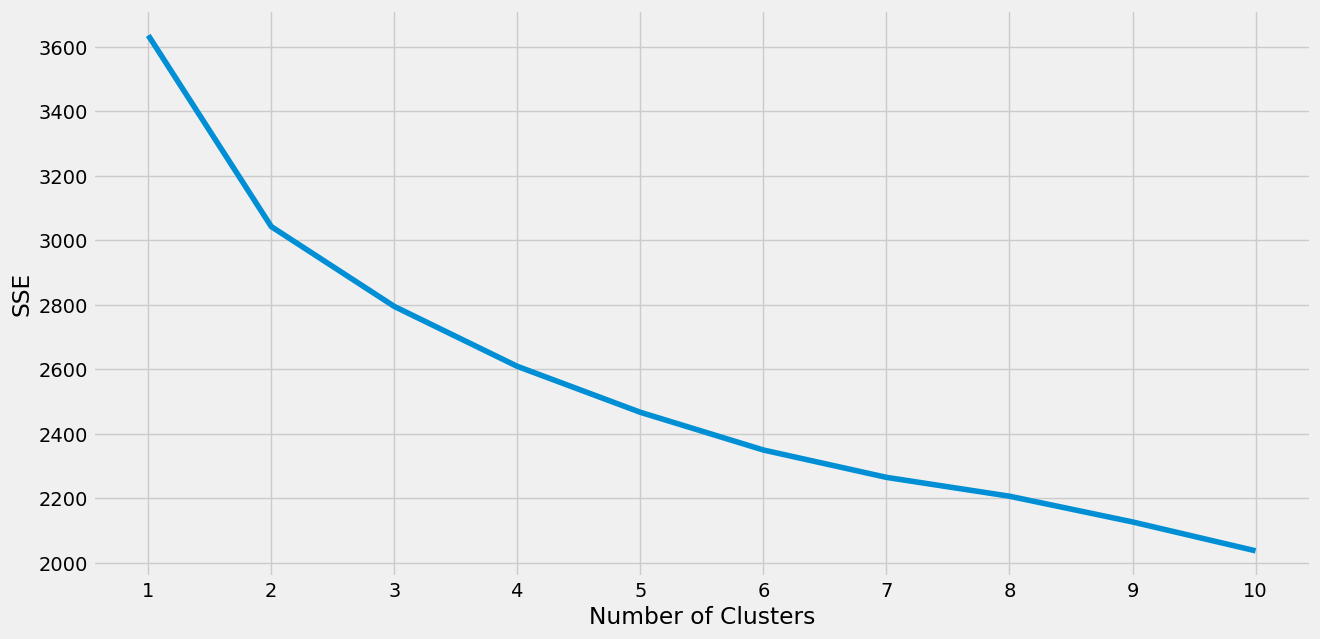

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Select features to cluster on, excluding the last two columns
features = data.iloc[:, :-2]

# Create a pipeline for imputation of infinite values, scaling, and clustering
pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.inf, strategy='mean')),  # Imputes infinite values
    ('scaler', StandardScaler()),  # Scales features
    ('kmeans', KMeans(init="random", n_init=10, max_iter=300, random_state=42))  # KMeans clustering
])

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    pipeline.set_params(kmeans__n_clusters=k)  # Update the number of clusters
    pipeline.fit(features)  # Fit the pipeline
    sse.append(pipeline.named_steps['kmeans'].inertia_)  # Get the SSE from the 'kmeans' step

# Plot the elbow curve
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [89]:
# Assuming 'data' is your DataFrame with the features to be clustered
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)  # Scale the features

# Define the range of k values to try
k_values = range(2, 5)

# Compute SSE for different k values using list comprehension
# and set n_init explicitly to avoid the warning
total_sse = [KMeans(n_clusters=k, n_init=10, random_state=0).fit(X_scaled).inertia_ for k in k_values]

# Display the SSE for each k value
for k, sse in zip(k_values, total_sse):
    print(f"SSE for k={k}: {sse}")

SSE for k=2: 3485.5497352645853
SSE for k=3: 3242.2268247531542
SSE for k=4: 3043.6168116763383


The provided code computes the sum of squared errors (SSE) for a range of k values and generates a visual representation of the elbow curve. The purpose of this elbow curve is to assist in identifying the most suitable number of clusters. To substantiate the choice of a specific number of clusters based on the elbow plot, we can analyze the curve's slope before and after the elbow point:

- Before the elbow point, the slope is steep, indicating that adding more clusters significantly reduces SSE.
- After the elbow point, the slope becomes less steep, suggesting that increasing the number of clusters beyond a certain threshold may not yield significant improvements in clustering performance.

Based on this analysis, it appears that the optimal number of clusters is 2. This conclusion is supported by the observation that the total within-cluster sum of squares (SSE) decreases as the number of clusters increases, which is an expected trend. Additionally, the decrease in SSE from k=2 to k=3 is more substantial than the decrease from k=3 to k=4, implying that k=2 may indeed be the most suitable number of clusters.
### Selected Values: k=2, k=3, k=4

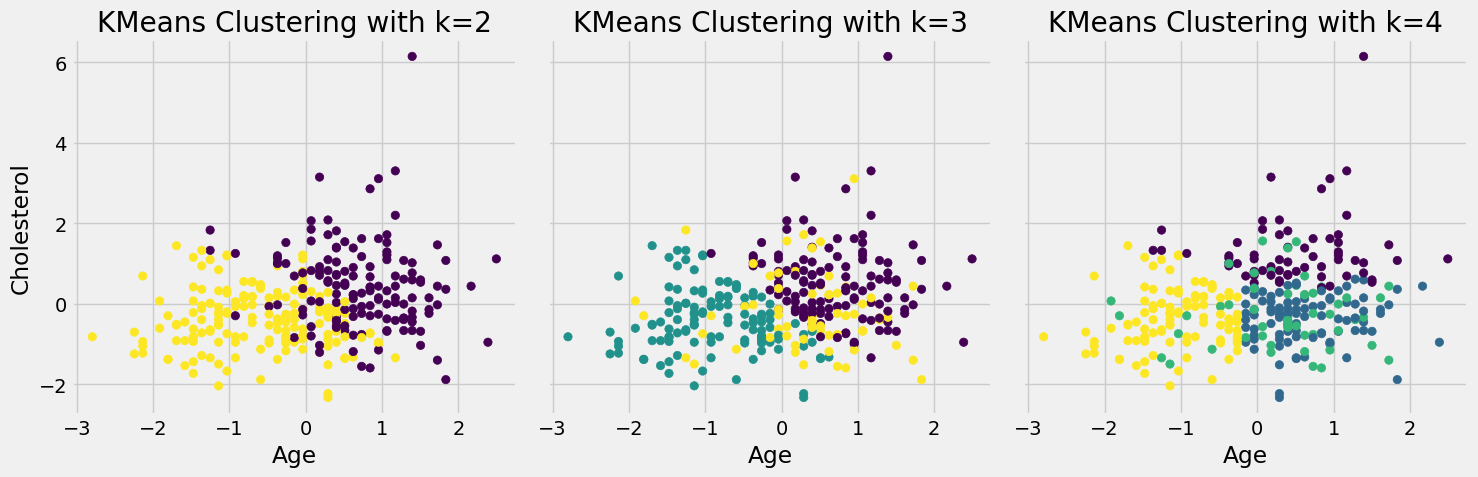

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features to cluster on
X = data[['age', 'chol', 'oldpeak']]

# Scale the features to have zero mean and unit variance
X_scaled = scaler.fit_transform(X)

# Define a dictionary to hold the KMeans models for different numbers of clusters
kmeans_models = {
    2: KMeans(n_clusters=2, random_state=0),
    3: KMeans(n_clusters=3, random_state=0),
    4: KMeans(n_clusters=4, random_state=0)
}

# Fit the KMeans model for each k value
for k, kmeans in kmeans_models.items():
    kmeans.fit(X_scaled)

# Create a subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot the clusters for each k value
for i, (k, kmeans) in enumerate(kmeans_models.items()):
    axs[i].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
    axs[i].set_xlabel('Age')
    if i == 0:  # Add y-label only to the first subplot for clarity
        axs[i].set_ylabel('Cholesterol')
    axs[i].set_title(f'KMeans Clustering with k={k}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The specific meaning of each color is contingent on the particular features utilized for clustering and the outcomes of the KMeans algorithm. Nevertheless, in a general sense, each color symbolizes a set of individuals who share similar attribute values used in the clustering process.

In the initial scatter plot (k=2), the two colors distinguish two distinct clusters:

- The yellow color represents a cluster of individuals characterized by lower average age and cholesterol values.
- The purple color represents another cluster of individuals with higher average age and cholesterol values.

In the subsequent scatter plot (k=3), the three colors correspond to three separate clusters:

- The green color identifies a cluster of individuals with the lowest average age and cholesterol values.
- The yellow color distinguishes a cluster of individuals with intermediate age and cholesterol values.
- The purple color signifies yet another cluster of individuals characterized by the highest average age and cholesterol values.

In the final scatter plot (k=4), the four colors are indicative of four distinct clusters:

- The green color is associated with individuals having the lowest average age and cholesterol values.
- The yellow color corresponds to a cluster of individuals with intermediate age and cholesterol values and low oldpeak values.
- The blue color represents a cluster of individuals with intermediate age and cholesterol values but with high oldpeak values.
- The purple color designates a cluster of individuals with the highest average age and cholesterol values.

### apply silhouette method

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Instantiate KMeans models with different numbers of clusters
k_values = [2, 3, 4]
for k in k_values:
    # Create a KMeans instance with k clusters and fit to the scaled data
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)

    # Obtain silhouette scores for each sample
    silhouette_vals = silhouette_samples(X_scaled, kmeans.labels_)

    # Compute the average silhouette score for this k
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    print(f"\nOverall silhouette score for k={k}: {silhouette_avg:.3f}")

    # Compute and print the silhouette score for each cluster
    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
        cluster_silhouette_avg = np.mean(cluster_silhouette_vals)
        print(f"Cluster {i} silhouette score: {cluster_silhouette_avg:.3f}")


Overall silhouette score for k=2: 0.284
Cluster 0 silhouette score: 0.187
Cluster 1 silhouette score: 0.371

Overall silhouette score for k=3: 0.290
Cluster 0 silhouette score: 0.252
Cluster 1 silhouette score: 0.354
Cluster 2 silhouette score: 0.238

Overall silhouette score for k=4: 0.269
Cluster 0 silhouette score: 0.173
Cluster 1 silhouette score: 0.290
Cluster 2 silhouette score: 0.236
Cluster 3 silhouette score: 0.329


Silhouette scores provide an overall assessment of clustering quality, with values ranging from 0 to 1. Higher silhouette scores, closer to 1, suggest more well-defined clusters. Analyzing the silhouette scores:

- For k=2, the overall silhouette score is 0.284. The individual cluster silhouette scores are 0.187 for Cluster 0 and 0.371 for Cluster 1.
- For k=3, the overall silhouette score is 0.290. The individual cluster silhouette scores are 0.252 for Cluster 0, 0.354 for Cluster 1, and 0.238 for Cluster 2.
- For k=4, the overall silhouette score is 0.269. The individual cluster silhouette scores are 0.173 for Cluster 0, 0.290 for Cluster 1, 0.236 for Cluster 2, and 0.329 for Cluster 3.

Based on these silhouette scores, the most favorable clustering solution is achieved with k=3, followed by k=2, and then k=4, in that order. This suggests that k=3 results in the most well-defined clusters, followed by k=2 and k=4, with progressively lower silhouette scores.
### BCubed precision and recall

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score

# Get ground truth labels
y_true = data['target']

# Compute precision and recall for different numbers of clusters
for k in range(2, 5):
    # Apply KMeans clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

    # Predict the cluster for each data point
    y_pred = kmeans.labels_

    # Compute precision and recall
    # Note: Adjust the `pos_label` parameter as necessary or remove it if your ground truth is not binary.
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    # Print precision and recall for the current value of k
    print(f"Precision for k={k}: {precision:.4f}")
    print(f"Recall for k={k}: {recall:.4f}")

Precision for k=2: 0.4388
Recall for k=2: 0.4290
Precision for k=3: 0.4391
Recall for k=3: 0.3630
Precision for k=4: 0.4071
Recall for k=4: 0.2211


Precision and recall values for different values of k are as follows:

- Precision for k=2: 0.4388
- Recall for k=2: 0.4290
- Precision for k=3: 0.4391
- Recall for k=3: 0.3630
- Precision for k=4: 0.4071
- Recall for k=4: 0.2211

When considering k=2, both precision and recall values are relatively high, indicating that the clustering algorithm is achieving a reasonable level of separation between the clusters. However, there might still be some overlap between the clusters and occasional misclassification of data points.

For k=3 and k=4, the precision and recall values are lower, indicating that the clustering algorithm is facing challenges in effectively distinguishing data into distinct clusters. Nevertheless, it is important to note that one of these clusterings might be more meaningful or practical based on the specific application or domain, despite the lower precision and recall values.

### Compare between k=2, k=3, k=4

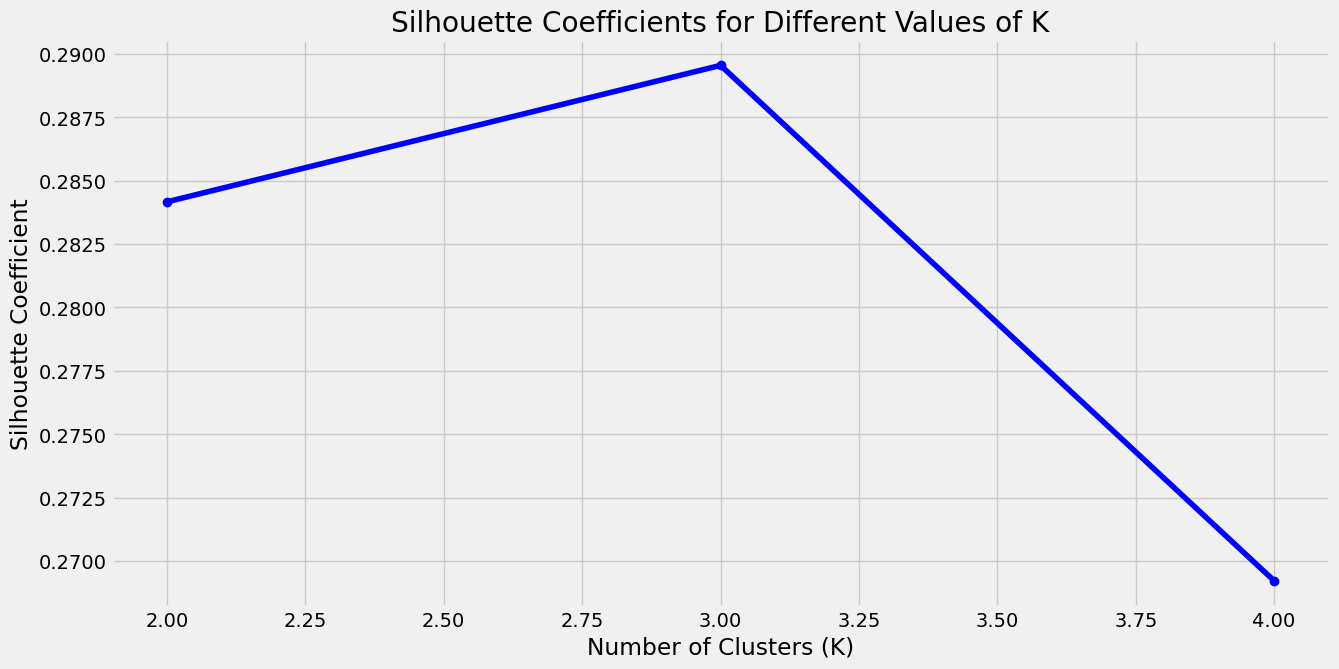

In [94]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preset K values
k_values = [2, 3, 4]
# Instantiate KMeans models and compute silhouette scores
silhouette_scores = [silhouette_score(X_scaled, KMeans(n_clusters=k, random_state=42).fit(X_scaled).labels_) for k in k_values]

# Plot silhouette scores against the number of clusters
plt.plot(k_values, silhouette_scores, 'o-', color='blue')
plt.title("Silhouette Coefficients for Different Values of K")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()


From the silhouette coefficients plot for various K values, it's clear that K=3 produces the highest silhouette coefficient, while K=2 and K=4 yield lower silhouette coefficients. Consequently, the most suitable number of clusters for this dataset is K=3. This decision is based on the fact that the silhouette coefficient gauges how similar data points are within clusters compared to data points in other clusters. A higher silhouette coefficient signifies that the data points within a cluster exhibit greater similarity to one another and less similarity to points in different clusters.